# **EDA Titanic Data Set**

## Mengunggah dataset

Dalam proyek ini digunakan 2 dataset, yaitu dataset train dan dataset test dari Titanic

In [0]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Penjelasan :
* Pclass = kelas tiket (1=VIP, 2=Bisnis, 3=Ekonomi)
* SibSp = Orang tua
* Parch = Anak-anak
* Cabin = Alamat kabin
* Embarked = Pemberangkatan

In [0]:
train.shape

(891, 12)

In [0]:
test.shape

(418, 11)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### **Visualisasi data untuk mendapatkan gambaran dasar**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
def bar_grafik(feature):
  survived   = train[train['Survived']==1][feature].value_counts()
  dead       = train[train['Survived']==0][feature].value_counts()
  data       = pd.DataFrame([survived,dead])
  data.index = ['Survived','Dead']
  data.plot(kind='bar', stacked=True, figsize=(10,5))

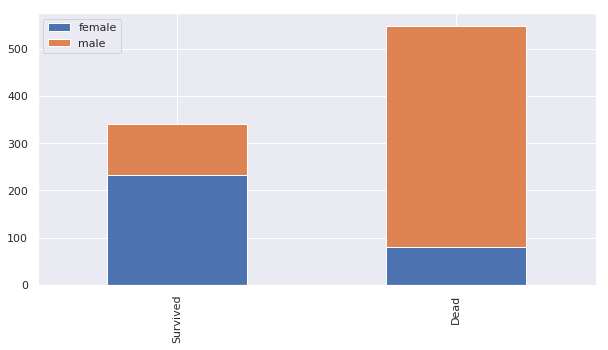

In [0]:
bar_grafik('Sex')

Grafik mengkonfirmasi bahwa wanita cenderung lebih bertahan hidup daripada laki-laki

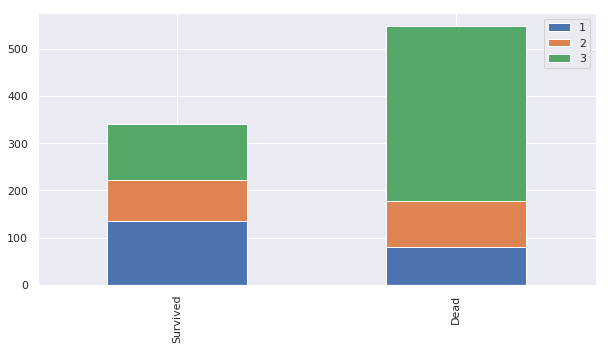

In [0]:
bar_grafik('Pclass')

* Grafik mengkonfirmasi bahwa penumpang pada kelas Ekonomi lebih banyak yang meninggal dibandingkan dengan kelas yang lainnya.
* Grafik mengkonfirmasi bahwa penumpang di kelas VIP lebih banyak yang hidup dibanding dengan kelas yang lainnya.

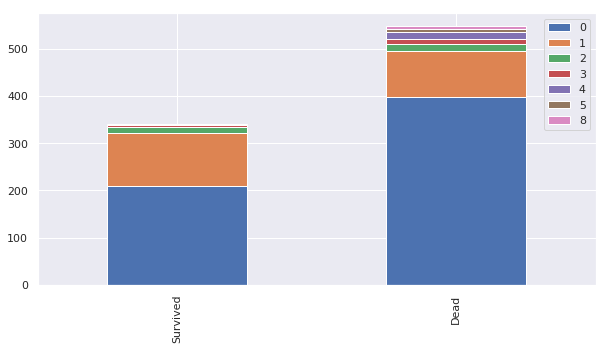

In [0]:
bar_grafik('SibSp')

* Grafik mengkonfirmasi bahwa penumpang yang tidak bersama Orang Tua lebih banyak yang meninggal dibandingkan penumpang yang berlayar bersama 2 atau lebih Orang Tua

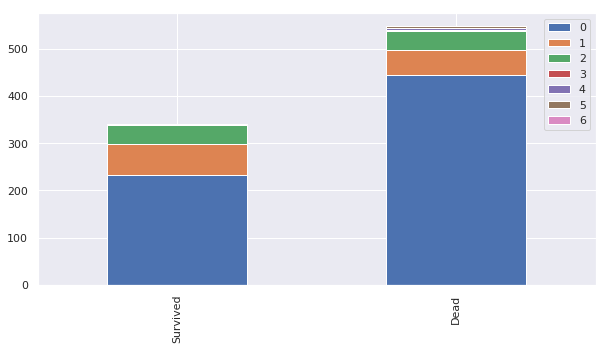

In [0]:
bar_grafik('Parch')

* Grafik mengkonfirmasi bahwa penumpang yang berlayar dengan lebih dari 2 orang tua atau anak cenderung hidup.
* Grafik mengkonfirmasi bahwa penumpang yang berlayar sendirian lebih berpotensi meninggal.

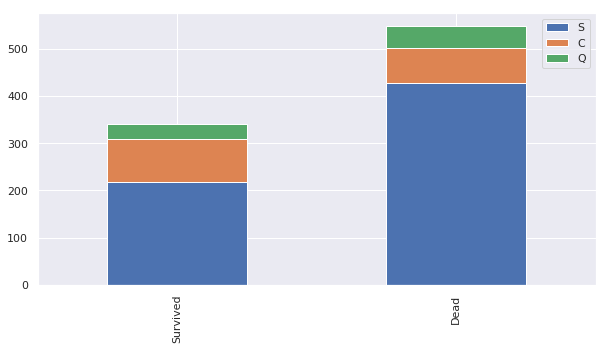

In [0]:
bar_grafik('Embarked')

* Grafik mengkonfirmasi bahwa penumpang yang masuk kapal dari S sedikt berpotensi untuk selamat.
* Grafik mengkonfirmasi bahwa penumpang yang masuk kapal dari C  dan Q cenderung untuk meninggal

## Feature Engineering

ini merupakan proses pengolahan data menjadi vektor numerik yang dapat diolah oleh algoritma Machine Learning dengan memanfaatkan Pengetahuan Dasar dari data.

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Bagaimana Titanic Tenggelam?

Titanic tenggelam dari tengah kapal yang pecah, kemudian tenggelam ke dasar laut. Kapal terlihat terjungkir dari belakang, dimana terdapat kabin untuk kelas Ekonomi. Sehingga, Pclass kemungkinan adalah faktor utama untuk klasifikasi penyebab dalam kasus ini.

![teks alternatif](http://aoife.dbsdataprojects.com/wp-content/uploads/sites/127/2016/06/TItanic-Survival-Infographic-825x510.jpg)

In [0]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 2. Nama

In [0]:
#Menggabungkan dataset training dan test
train_test_data = [train, test] 

for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [0]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Sir           1
Capt          1
Don           1
Lady          1
Ms            1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [0]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

#### Peta Gelar

Sehingga data diatas dapat dituliskan dengan :
* Mr     = 0
* Miss   = 1
* Mrs    = 2
* **Lainnya** = 3


In [0]:
Peta_Gelar = {"Mr" : 0, "Miss" : 1, "Mrs" : 2,
              "Master" : 3, "Col" : 3, "Rev" : 3, "Dr" : 3, "Ms" : 3, "Dona" : 3, 
              "Jonkheer" : 3, "Don" : 3, "Countess" : 3, "Sir" : 3, "Lady" : 3, 
              "Capt" : 3, "Mme" : 3, "Major" : 3, "Mlle" : 3}

for dataset in train_test_data :
  dataset['Title'] = dataset['Title'].map(Peta_Gelar)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


Sekarang coba kita plot grafik dari Gelar (Title)

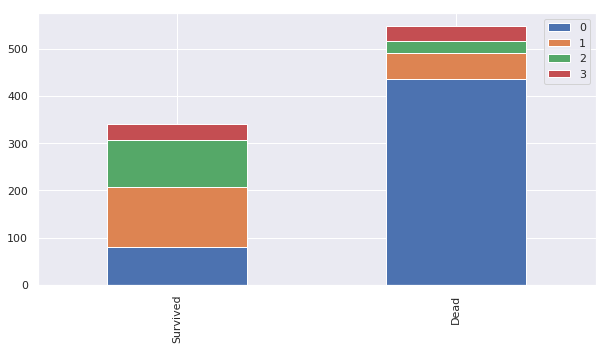

In [0]:
bar_grafik('Title')

In [0]:
#Menghapus kolom data yang tidak diperlukan
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### 3. Jenis Kelamin

* Laki-laki = 0
* Perempuan = 1

In [0]:
Jenis_kelamin = {"male" : 0, "female" : 1}

for dataset in train_test_data :
  dataset['Sex'] = dataset['Sex'].map(Jenis_kelamin)

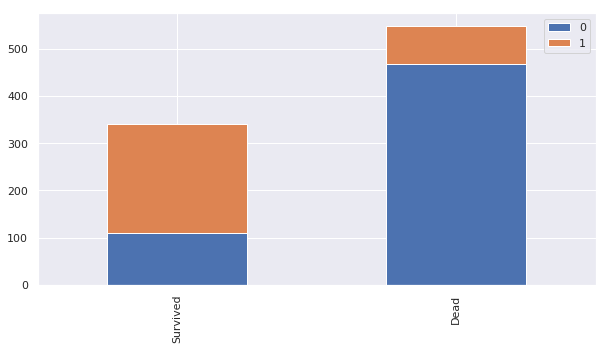

In [0]:
bar_grafik('Sex')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


### 4. Usia

#### 4.1 Beberapa nilai pada usia hilang
Hal ini bisa diatasi dengan menggunakan median dari data Gelar (Title) untuk mengisi nilai usia yang hilang.

In [0]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2


In [0]:
# Mengisi nilai usia yang hilang dengan median usia untuk setiap Gelar (Mr, Mrs, Miss, Yang lainnya)
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

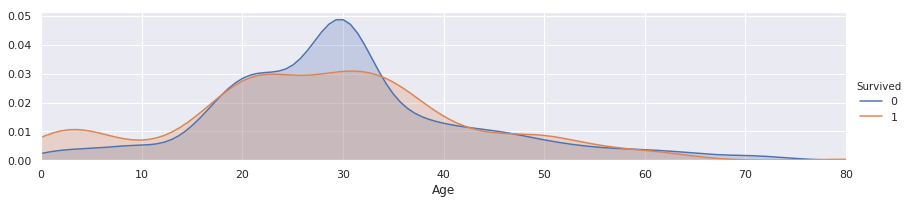

In [0]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

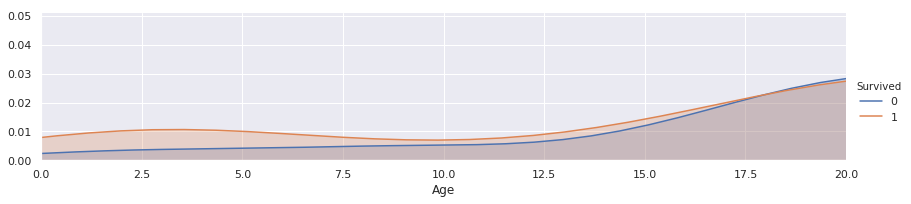

In [0]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(0, 20)

(20, 40)

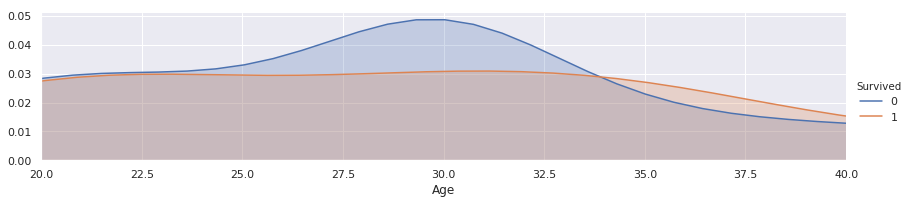

In [0]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(20, 40)

(40, 60)

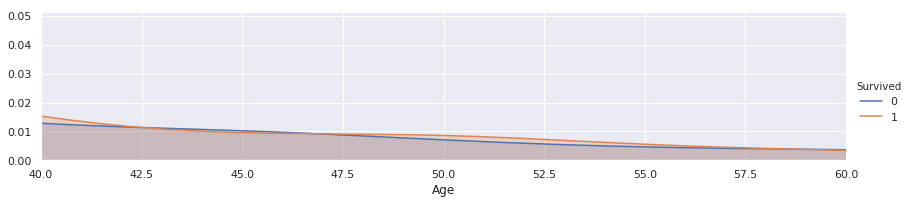

In [0]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(40, 60)

(60, 80)

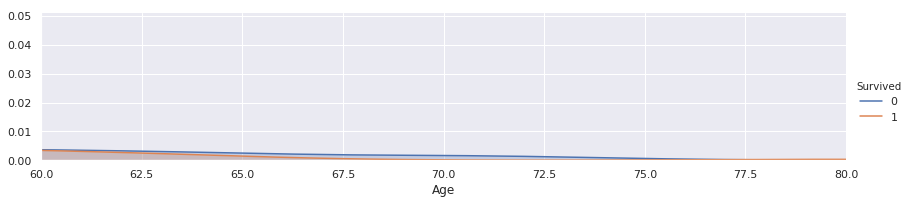

In [0]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(60, 80)

#### Konversi Usia Numerik menjadi Variabel Kategorik

* Anak-anak = 0
* Remaja = 1
* Dewasa = 2
* mid-age = 3
* Lansia = 4

In [0]:
for dataset in train_test_data :
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age' ] = 1
  dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age' ] = 2
  dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age' ] = 3
  dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


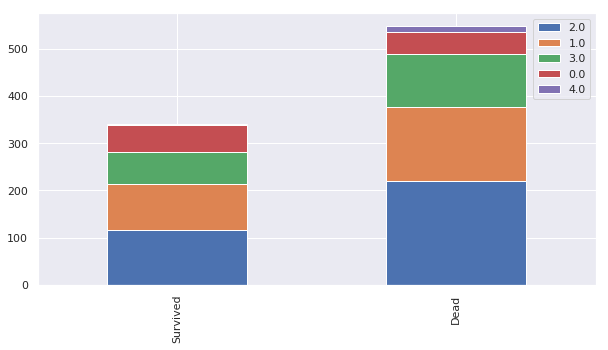

In [0]:
bar_grafik('Age')

### 5. Pelabuhan asal (Embarked)

#### 5.1. Memenuhi nilai yang hilang

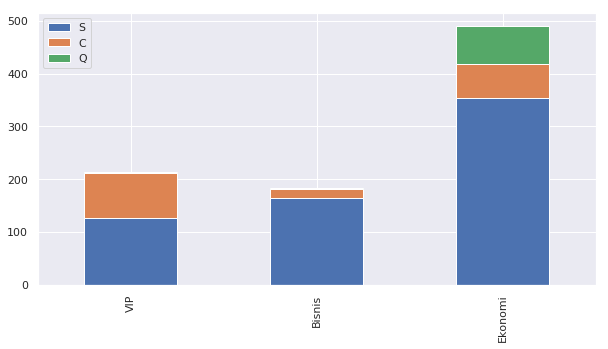

In [0]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['VIP', 'Bisnis', 'Ekonomi']
df.plot(kind='bar', stacked=True, figsize=(10,5))

Dapat ditarik kesimpulan
* Lebih dari 50% penumpang Kelas VIP dari pelabuhan S
* Lebih dari 50% penumpang Kelas Bisnis dari pelabuhan S
* Lebih dari 50% penumpang Kelas Ekonomi dari pelabuhan S


Sehingga kita dapat mengisi data yang hilang pada kolom Embarked dengan Pelabuhan S (S Embark)

In [0]:
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [0]:
peta_pelabuhan = {'S' : 0, 'C' : 1, 'Q' : 2}

for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(peta_pelabuhan)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


### 6. Biaya Perjalanan


In [0]:
#Mengisi data yang kosong dengan median dari biaya di setiap Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

<function matplotlib.pyplot.show>

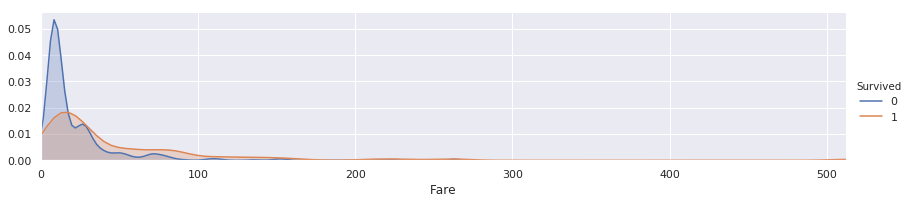

In [0]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show

In [0]:
for dataset in train_test_data:
  dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
  dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
  dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
  dataset.loc[(dataset['Fare'] > 100), 'Fare'] = 3

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


#### Kabin (Cabin)

In [0]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
D              3
E101           3
F33            3
C22 C26        3
D20            2
B49            2
C83            2
B22            2
C123           2
D33            2
C126           2
E24            2
B5             2
C2             2
B35            2
F4             2
D26            2
C65            2
B28            2
C68            2
E8             2
D17            2
C125           2
E67            2
C78            2
B77            2
              ..
D50            1
D19            1
D47            1
A5             1
C45            1
C104           1
C62 C64        1
D56            1
D28            1
C106           1
A7             1
C110           1
A32            1
B80            1
C7             1
C85            1
E77            1
C47            1
B78            1
C32            1
E10            1
T              1
D49            1
B42            1
C148           1
C99            1
D37            1
B4            

In [0]:
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].str[:1]

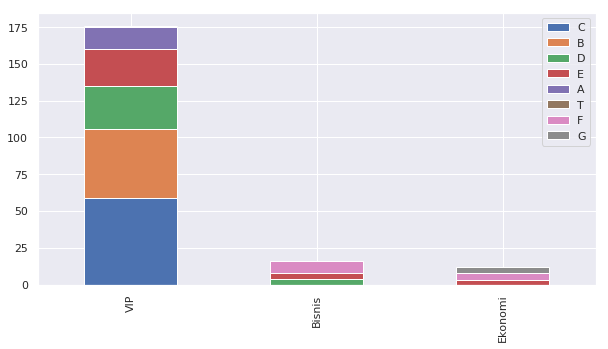

In [0]:
Pclass1 = train[ train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[ train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[ train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['VIP', 'Bisnis', 'Ekonomi']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [0]:
peta_kabin = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
for dataset in train_test_data:
  dataset['Cabin']=dataset['Cabin'].map(peta_kabin)

In [0]:
#Mengisi nilai yang kosong pada kolom FARE dengan nilai median dari fear di setiap Pclass
train['Cabin'].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test['Cabin'].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


#### FamilySize

In [0]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

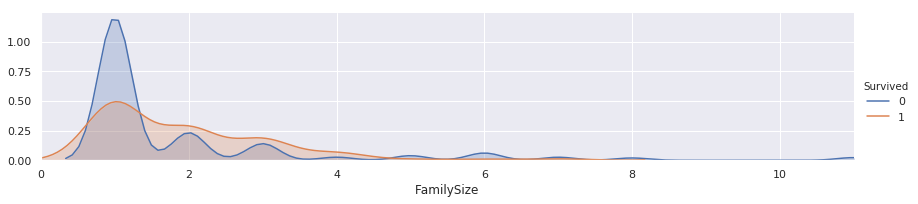

In [0]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [0]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
  dataset ['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [0]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis = 1)

In [0]:
train_data = train.drop(['Survived'], axis = 1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [0]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


### Modelling

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


#### Cross Validation (K-Fold)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle=True, random_state=0)

#### 1. SVM

In [0]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
round(np.mean(score)*100,2)

83.5

#### Testing